In [1]:
!pip install pandas scikit-learn xgboost tensorflow


### **Data Preprocessing**

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from scipy import stats

# Load Datasets
train_data = pd.read_csv('synthetic_data_ctgan.csv')
test_data = pd.read_csv('heart.csv')

# Check for missing values and fill them with the mean of the respective columns
train_data.fillna(train_data.mean(), inplace=True)
test_data.fillna(test_data.mean(), inplace=True)

# Handling outliers using Z-score method (keeping values with Z-score < 3)
z_scores = np.abs(stats.zscore(train_data))
train_data = train_data[(z_scores < 3).all(axis=1)]

# Splitting features and target
X_train = train_data.drop(columns=['target'])  # assuming 'target' is the column for labels
y_train = train_data['target']
X_test = test_data.drop(columns=['target'])
y_test = test_data['target']

# Normalizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Balancing the dataset using SMOTE (Synthetic Minority Over-sampling Technique)
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

#Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()



**Linear Regression with Regularization (Ridge)**

Ridge Regression Accuracy: 0.8048780487804879
              precision    recall  f1-score   support

           0       0.85      0.73      0.78       499
           1       0.77      0.88      0.82       526

    accuracy                           0.80      1025
   macro avg       0.81      0.80      0.80      1025
weighted avg       0.81      0.80      0.80      1025



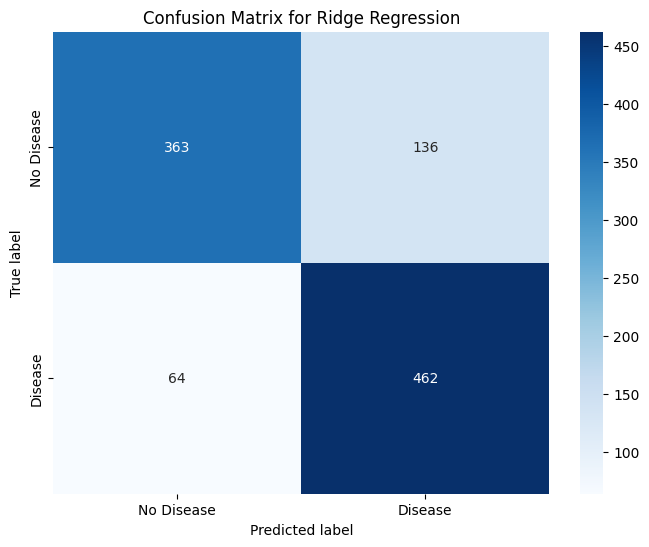

In [3]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_bal, y_train_bal)

# Predictions
y_pred_ridge = np.round(ridge.predict(X_test))

# Accuracy and report
print("Ridge Regression Accuracy:", accuracy_score(y_test, y_pred_ridge))
print(classification_report(y_test, y_pred_ridge))

# Confusion Matrix
plot_confusion_matrix(y_test, y_pred_ridge, "Ridge Regression")



## **Decision Tree with Cross-Validation and Grid Search**

Best Parameters for Decision Tree: {'max_depth': 5, 'min_samples_split': 2}
Decision Tree Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       499
           1       0.79      0.82      0.81       526

    accuracy                           0.80      1025
   macro avg       0.80      0.80      0.80      1025
weighted avg       0.80      0.80      0.80      1025



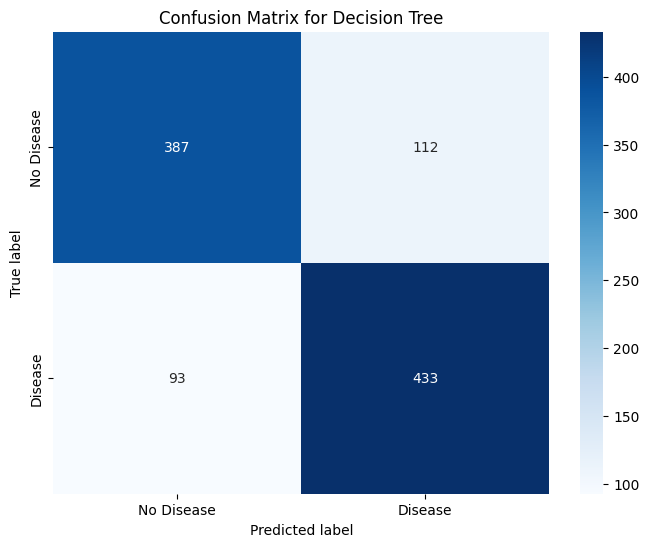

In [4]:
from sklearn.tree import DecisionTreeClassifier

# Hyperparameter tuning using GridSearchCV
param_grid = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}
grid_dtree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_dtree.fit(X_train_bal, y_train_bal)

# Best parameters and predictions
print("Best Parameters for Decision Tree:", grid_dtree.best_params_)
y_pred_dt = grid_dtree.predict(X_test)

# Accuracy and report
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree")


### **K-Nearest Neighbors (KNN) with Hyperparameter Tuning and Cross-Validation**

Best Parameters for KNN: {'n_neighbors': 5, 'weights': 'distance'}
KNN Accuracy: 0.817560975609756
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       499
           1       0.79      0.88      0.83       526

    accuracy                           0.82      1025
   macro avg       0.82      0.82      0.82      1025
weighted avg       0.82      0.82      0.82      1025



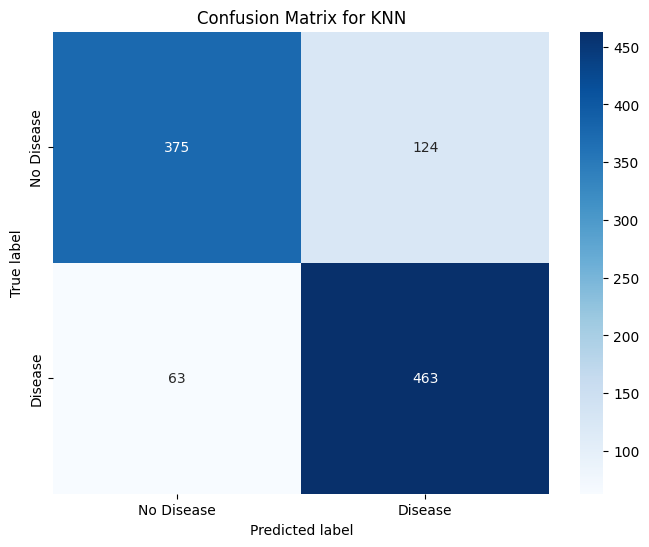

In [5]:
from sklearn.neighbors import KNeighborsClassifier

# Hyperparameter tuning using GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_knn.fit(X_train_bal, y_train_bal)

# Best parameters and predictions
print("Best Parameters for KNN:", grid_knn.best_params_)
y_pred_knn = grid_knn.predict(X_test)

# Accuracy and report
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
plot_confusion_matrix(y_test, y_pred_knn, "KNN")


### **Support Vector Machine (SVM) with Grid Search and Cross-Validation**

Best Parameters for SVM: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
SVM Accuracy: 0.8156097560975609
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       499
           1       0.81      0.83      0.82       526

    accuracy                           0.82      1025
   macro avg       0.82      0.82      0.82      1025
weighted avg       0.82      0.82      0.82      1025



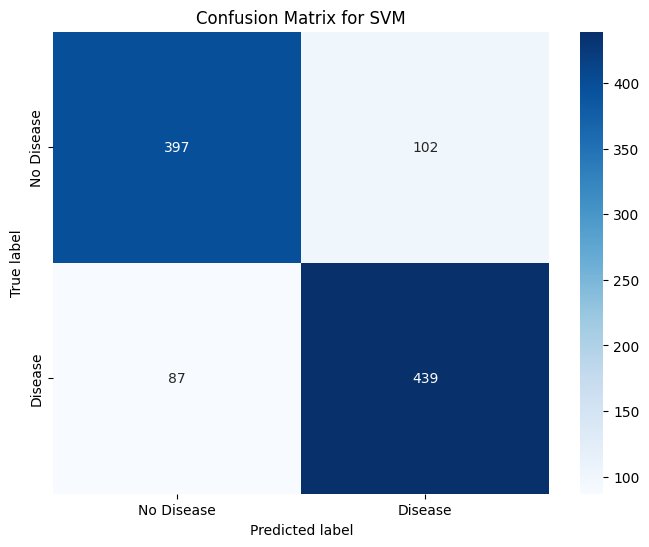

In [6]:
from sklearn.svm import SVC

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf', 'linear']}
grid_svm = GridSearchCV(SVC(), param_grid, cv=5)
grid_svm.fit(X_train_bal, y_train_bal)

# Best parameters and predictions
print("Best Parameters for SVM:", grid_svm.best_params_)
y_pred_svm = grid_svm.predict(X_test)

# Accuracy and report
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
plot_confusion_matrix(y_test, y_pred_svm, "SVM")


### **XGBoost with Hyperparameter Tuning**

Best Parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50}
XGBoost Accuracy: 0.7960975609756098
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       499
           1       0.80      0.80      0.80       526

    accuracy                           0.80      1025
   macro avg       0.80      0.80      0.80      1025
weighted avg       0.80      0.80      0.80      1025



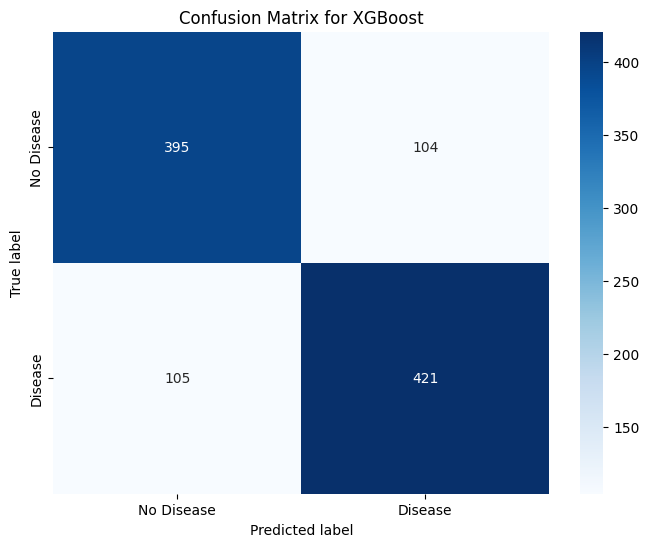

In [7]:
import xgboost as xgb

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}

grid_xgb = GridSearchCV(xgb.XGBClassifier(eval_metric='logloss'), param_grid, cv=5)
grid_xgb.fit(X_train_bal, y_train_bal)

# Best parameters and predictions
print("Best Parameters for XGBoost:", grid_xgb.best_params_)
y_pred_xgb = grid_xgb.predict(X_test)

# Accuracy and report
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")



### **Convolutional Neural Network (CNN)**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5316 - loss: 0.6830 - val_accuracy: 0.5356 - val_loss: 0.6822
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6632 - loss: 0.6256 - val_accuracy: 0.6634 - val_loss: 0.6159
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7127 - loss: 0.5770 - val_accuracy: 0.6693 - val_loss: 0.5817
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7483 - loss: 0.5249 - val_accuracy: 0.7122 - val_loss: 0.5632
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7662 - loss: 0.4946 - val_accuracy: 0.7229 - val_loss: 0.5725
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7950 - loss: 0.4642 - val_accuracy: 0.7063 - val_loss: 0.5491
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8083 - loss: 0.4160 - val_accuracy: 0.6946 - val_loss: 0.5871
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7904 - loss: 0.4501 - val_accuracy: 0.7434 - val_loss

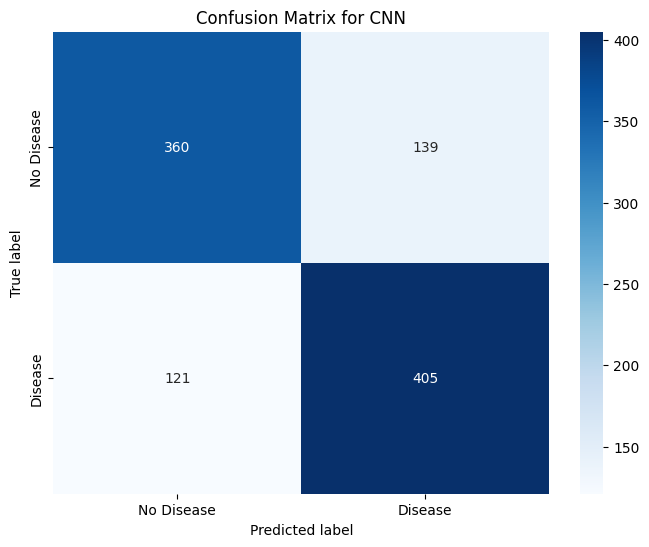

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout

# Reshape data for CNN
X_train_cnn = np.expand_dims(X_train_bal, axis=2)
X_test_cnn = np.expand_dims(X_test, axis=2)

# Define CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Conv1D(128, kernel_size=2, activation='relu'))  # Adding more layers
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))  # Add Dropout to prevent overfitting
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile and train the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_cnn, y_train_bal, epochs=20, batch_size=32, validation_data=(X_test_cnn, y_test))

# Evaluate and make predictions
y_pred_cnn = (cnn_model.predict(X_test_cnn) > 0.5).astype("int32")

# Accuracy and report
print("CNN Accuracy:", accuracy_score(y_test, y_pred_cnn))
print(classification_report(y_test, y_pred_cnn))

# Confusion Matrix
plot_confusion_matrix(y_test, y_pred_cnn, "CNN")



### **Ensemble Model**

Voting Classifier Accuracy: 0.8380487804878048
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       499
           1       0.82      0.88      0.85       526

    accuracy                           0.84      1025
   macro avg       0.84      0.84      0.84      1025
weighted avg       0.84      0.84      0.84      1025



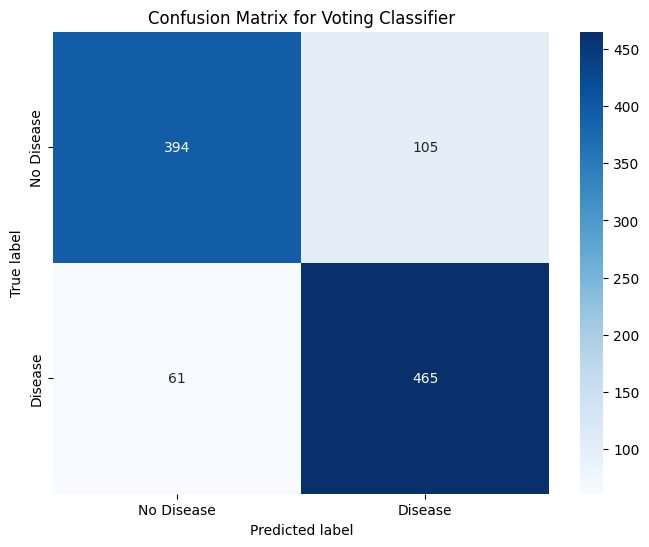

In [9]:
from sklearn.ensemble import VotingClassifier

# Voting Classifier using multiple models
voting_clf = VotingClassifier(estimators=[
    ('dt', grid_dtree.best_estimator_),
    ('svm', grid_svm.best_estimator_),
    ('knn', grid_knn.best_estimator_)
], voting='hard')

voting_clf.fit(X_train_bal, y_train_bal)

# Predictions and evaluation
y_pred_voting = voting_clf.predict(X_test)

# Accuracy and report
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_voting))
print(classification_report(y_test, y_pred_voting))

# Confusion Matrix
plot_confusion_matrix(y_test, y_pred_voting, "Voting Classifier")
